In [18]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
# os.getcwd()

# Read Raw Dataset 

In [9]:
# Avant 11/04/18:
# JUS=c("A3TCQJGS","ASBMY5MM") et QDP=c("A88W6WY9","A96PNDQP")
# Après 11/04/18:
# JUS=c("A3TCQJGS") et QDP=c("A88W6WY9") et JBS=c("A96PNDQP","ASBMY5MM"))

path = "O:\\Pôle EXPRESSO\\EspacePerso\\BW\\Python\\PAO_Insa\\Data\\Clarity\\"
file = path +"Part3\\180406-0605_QDP_All_QH.pkl"
rawdata = pd.read_pickle(file)
#//
rawdata.info()
rawdata.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5654 entries, 0 to 5653
Data columns (total 9 columns):
date              5654 non-null object
no#ref            5607 non-null float64
no2#ref           5607 non-null float64
pm10#ref          5637 non-null float64
pm2.5#ref         5625 non-null float64
co#ref            5625 non-null float64
pm2.5#A88W6WY9    5011 non-null float64
temp#A88W6WY9     5011 non-null float64
rh#A88W6WY9       5011 non-null float64
dtypes: float64(8), object(1)
memory usage: 397.6+ KB


,date,no#ref,no2#ref,pm10#ref,pm2.5#ref,co#ref,pm2.5#A88W6WY9,temp#A88W6WY9,rh#A88W6WY9
0,2018-04-06 12:15:00,17.3,22.9,21.6,8.6,0.101,2.058824,19.843597,37.723354
1,2018-04-06 12:30:00,18.0,21.7,21.6,8.6,0.088,3.000000,20.113297,37.735561


In [7]:
#// 
keep = [x for x in list(rawdata) if x not in ("pm2.5#ASBMY5MM","temp.ASBMY5MM","rh.ASBMY5MM")]
rawdata=rawdata[keep]
#//
# rawdata['date']=rawdata['date'].astype('datetime64')
# rawdata['date'] = pd.to_datetime(rawdata['date'], format='%d/%m/%Y %H:%M') 
rawdata['date'] = pd.to_datetime(rawdata['date'], format='%Y-%m-%d %H:%M:%S') 
#//
# rawdata = rawdata.dropna()
# rawdata= rawdata.reset_index()
#//
rawdata.info()
rawdata.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6054 entries, 0 to 6053
Data columns (total 16 columns):
date                6054 non-null datetime64[ns]
pm10.vol#ref        5587 non-null float64
pm2.5.nonvol#ref    5567 non-null float64
pm10.nonvol#ref     5589 non-null float64
pm2.5#ref           5568 non-null float64
pm2.5.vol#ref       5574 non-null float64
pm10#ref            5588 non-null float64
no2#ref             5612 non-null float64
no#ref              5612 non-null float64
pm2.5#A3TCQJGS      5042 non-null float64
temp#A3TCQJGS       5042 non-null float64
rh#A3TCQJGS         5042 non-null float64
Patm                5328 non-null float64
ws                  5328 non-null float64
wd                  5328 non-null float64
Tgrad               6054 non-null float64
dtypes: datetime64[ns](1), float64(15)
memory usage: 756.8 KB


,date,pm10.vol#ref,pm2.5.nonvol#ref,pm10.nonvol#ref,pm2.5#ref,pm2.5.vol#ref,pm10#ref,no2#ref,no#ref,pm2.5#A3TCQJGS,temp#A3TCQJGS,rh#A3TCQJGS,Patm,ws,wd,Tgrad
0,2018-04-06 12:15:00,-2.6,-1.0,9.5,3.8,-4.8,12.0,15.7,2.2,5.176471,20.094604,38.744183,1008.0,4.9,137.0,-2.8
1,2018-04-06 12:30:00,-1.8,-0.2,9.7,4.5,-4.7,11.4,14.6,2.4,4.352941,22.391090,35.011826,1008.0,5.6,127.0,-2.8


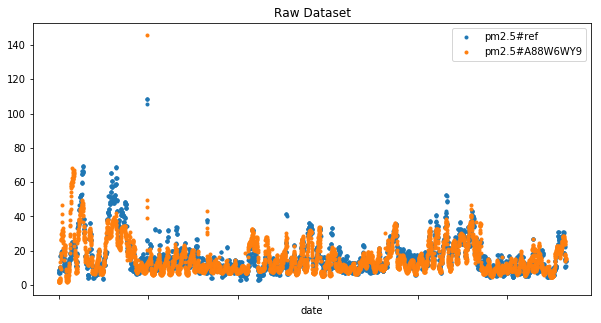

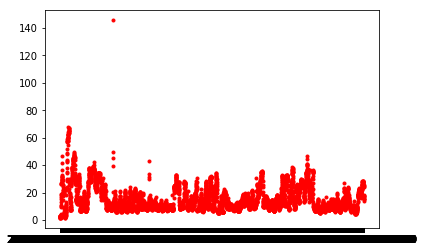

Text(0.5,0,'pm2.5#ref')

Text(0,0.5,'pm2.5#A88W6WY9')

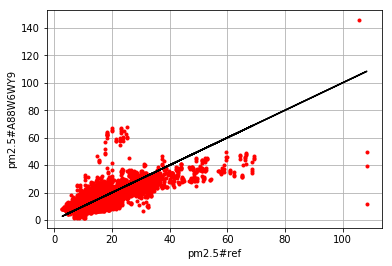

In [33]:
#//
# rawdata.set_index(['date'],inplace=True)
#//
x="date"
y1="pm2.5#ref"
y2="pm2.5#A88W6WY9"

rawdata.plot(x=x,y=[y1,y2],figsize=(10, 5),style=".",
             title="Raw Dataset")
plt.show()

plt.plot(rawdata.date, rawdata[[y2]], '.r')
plt.show()

plt.plot(rawdata[[y1]], rawdata[[y2]], '.r')
plt.plot(rawdata[[y1]], rawdata[[y1]],'black')
plt.xlabel(y1)
plt.ylabel(y2)
plt.grid(True)
plt.show()


# Read Normalised Dataset 

In [ ]:
DATA_PATH = "O:\\Pôle EXPRESSO\\EspacePerso\\BW\\Python\\PAO_Insa\\Data\\Data_Clarity\\Part2\\180205-0405_JUS_All_Norm.pkl"
df = pd.read_pickle(DATA_PATH)
df = df.dropna()
df = df.reset_index()
#//
df.info()
df.head()


# Premier modèle: Perceptron

Pour commencer, on crée un simple modèle de réseau de neurones à 1 couches dense et 1 couche de prédiction

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

def baseline_model(dense_size, input_dim, loss='mean_squared_error', optimizer='adam'):
    # 
    model = Sequential()
    model.add(Dense(dense_size, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model

### Découpage en trois jeux de données pour la validation croisée

In [ ]:
print(df.columns.values)

In [ ]:
def split_dataframe(dataframe, percent):
    """ Méthode permettant de séparer une dataframe en deux en fonction d'un pourcentage donné
    """
    nb_rows = int(np.floor(percent * len(dataframe)))
    return dataframe[:nb_rows], dataframe[nb_rows:]

def dataframe_to_xy(df):
    """ Retourne X et y en prenant une dataframe en argument   
    return (np.array(df[['no2#ref','no#ref','rh','temp', 'rh','pm2.5#A3TCQJGS','pm2.5#ASBMY5MM']]),\
            np.array(df['pm2.5#ref']))
    """
    return (np.array(df[['no2#ref','no#ref','rh.ASBMY5MM','temp.ASBMY5MM', 'pm2.5#ASBMY5MM']]),\
            np.array(df['pm2.5#ref']))


# On applique dataframe_to_xy à l'ensemble des données pour validation finale
X_all, y_all= dataframe_to_xy(df)
X_all[:5] ; y_all[:5]
y_all.size
plt.plot(y_all)

In [ ]:
# On effectue une permutation ici afin d'obtenir la répartition la plus homogène possible par jeu de donnée
df = df.reindex(np.random.permutation(df.index)) 
df.head(5)


In [ ]:
# Et on split en 3 jeux de données avec mises en forme finale pour données entrée modele
df_train, df_test = split_dataframe(df, 0.5) 
df_valid, df_test = split_dataframe(df_test, 0.5)

X_train, y_train = dataframe_to_xy(df_train)
X_valid, y_valid = dataframe_to_xy(df_valid)
X_test, y_test = dataframe_to_xy(df_test)

### Distribution des données sur les 3 jeux de validation croisée

In [ ]:
plt.plot(y_train, '+b')
plt.ylabel('Ref Values Training DataSet')
plt.show()
plt.plot(y_valid, '+r')
plt.ylabel('Ref Values Validation DataSet')
plt.show()
plt.plot(y_test, '+r')
plt.ylabel('Ref Values Test DataSet')
plt.show()


In [ ]:
model = baseline_model(32, X_train.shape[1], 'mean_squared_error', 'adam')
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=5000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1)

### Courbes de résultats pour modèle à une couche dense

In [ ]:
# plot cout en validation
plt.plot(history.history['loss'], 'r-', label="Coût")
plt.plot(history.history['val_loss'], 'b-', label="Coût en validation")
plt.title("Courbes de coût")
plt.legend()
plt.show()

# applique modele sur X_test et compare Y_pred à Y_test (=ref)
y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)
y_pred_test = model.predict(X_test)
plt.plot(y_train, y_pred_train,'.k')
plt.plot(y_valid, y_pred_valid,'.b')
plt.plot(y_test, y_pred_test,'.r')
plt.title("Model=f(Ref) - Train, Valid & Test Dataset")
plt.plot(y_test,y_test, 'k',lw=0.5)
plt.grid(True)
plt.show()

# applique modele sur X_test et compare Y_pred à Y_test (=ref)
x="# date"
y1="pm2.5#ref"
y2="pm2.5#A3TCQJGS"

y_pred_all = model.predict(X_all)
plt.plot(mydata[[y1]], mydata[[y2]], '.k')
plt.plot(y_all, y_pred_all,'.r')
plt.title("Capteur=f(Ref) - Sans/Avec Correction")
plt.plot(mydata[[y1]],mydata[[y1]], 'k',lw=0.5)
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
# mydata[[y1,y2]].plot(figsize=(10, 5),style=".",title="Raw Dataset")
plt.plot(np.arange(2997),mydata[[y2]],"-",markersize=6)
plt.plot(y_pred_all,".",markersize=4)
plt.plot(y_all,"-k", markersize=6)
# plt.grid(True)
# plt.show()

# import plotly.plotly as py
# import plotly.graph_objs as go
# data = [go.Bar(x=np.arange(2997),y=np.arange(2997))]
# py.iplot(data, filename='jupyter-basic_bar')

In [ ]:
mydata.set_index(['index'],inplace=True)

## MLP 2 Couches

### Définition du modèle

In [ ]:
def two_layers_mlp_model(nb_units, dense_size, loss='mean_squared_error', optimizer='adam'):
    model = Sequential()
    model.add(Dense(dense_size, input_dim=dense_size, kernel_initializer='normal', activation='relu'))
    model.add(Dense(dense_size//2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss=loss, optimizer=optimizer)
    model.summary()
    return model

model = two_layers_mlp_model(32, X_train.shape[1])

### Apprentissage

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=5000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1)

### Courbes de résultats pour modèle à deux couches denses

In [ ]:
y_pred = model.predict(X_test)
plt.plot(history.history['loss'], 'r-', label="Coût")
plt.plot(history.history['val_loss'], 'b-', label="Coût en validation")
plt.title("Courbes de coût")
plt.legend()
plt.show()

plt.title('y_pred, y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.title("Prédiction en fonction de test")
plt.show()

# Conclusion

Sur ces premiers tests, le modèle a une couche a l'air un peu plus performant que le modèle a deux couches. En effet, le modèle prédictif est presque linéaire. Essayons maintenant d'implémenter un modèle récurrent